### Geoseries and GeoPandas

In [1]:
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Point

In [3]:
# Geoseries
places = GeoSeries ([
Point(1,2),
    Point(3,4),
    Point(5,6)
])

places

0    POINT (1.00000 2.00000)
1    POINT (3.00000 4.00000)
2    POINT (5.00000 6.00000)
dtype: geometry

In [5]:
# GeoDataFrame

gdf = GeoDataFrame({
    "name": ["My House", "My School", "My Park"],
    "type": ["House", "School", "Park"],
    "geometry": places
})

gdf

,name,type,geometry
0,My House,House,POINT (1.00000 2.00000)
1,My School,School,POINT (3.00000 4.00000)
2,My Park,Park,POINT (5.00000 6.00000)


### Reading data (Shapefile, Geojson, and Geopackages)

<h3>Reading a local shapefile </h3>

<Axes: >

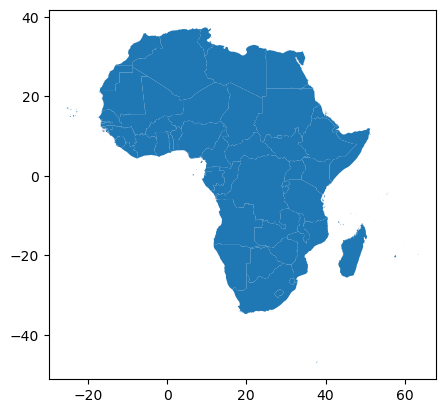

In [8]:
file = r'.\africa\afr_g2014_2013_0.shp'
gdf = gpd.read_file(file)
gdf.plot()

### Reading a local zip file

### Reading files from url

<Axes: >

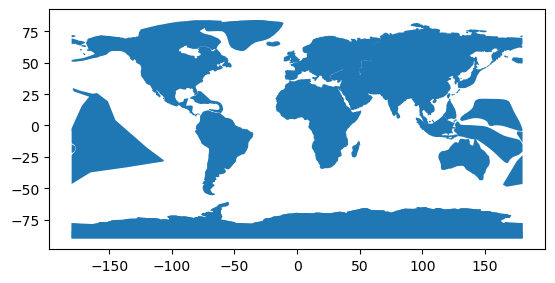

In [11]:
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_geography_regions_polys.geojson"
url_gdf = gpd.read_file(url)
url_gdf.plot()

### Geopandas Datasets

In [13]:
print(gpd.datasets.available)

['naturalearth_cities', 'naturalearth_lowres', 'nybb']


In [14]:
cities_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities_gdf

C:\Users\Owner\AppData\Local\Temp\ipykernel_20392\2357599374.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)
...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.21255 -33.87137)
241,Singapore,POINT (103.85387 1.29498)


<Axes: >

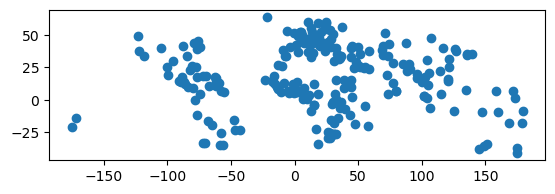

In [15]:
cities_gdf.plot()

### Indexing and Selecting Data

C:\Users\Owner\AppData\Local\Temp\ipykernel_20392\1757465348.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

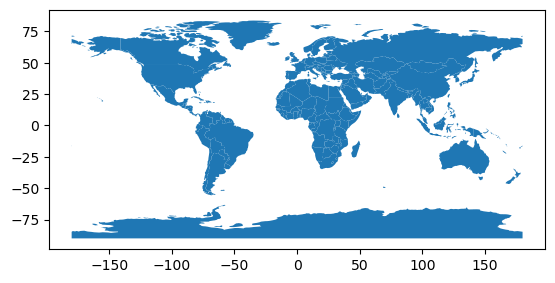

In [20]:
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_gdf
world_gdf.plot()


Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

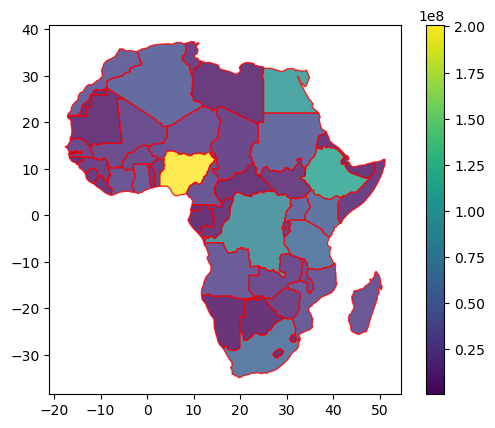

In [30]:
africa = world_gdf[world_gdf['continent'] == 'Africa']
africa.plot(
    column="pop_est", #field for symbology
    cmap='viridis', #Choosing color symbology
    legend='True', # Adding legend
    edgecolor='red', # Adding boundary size
    alpha=0.8 # Transparency
)
africa.columns

C:\Users\Owner\AppData\Local\Temp\ipykernel_20392\4044109111.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(africa.geometry.centroid.x, africa.geometry.centroid.y, africa['name']):


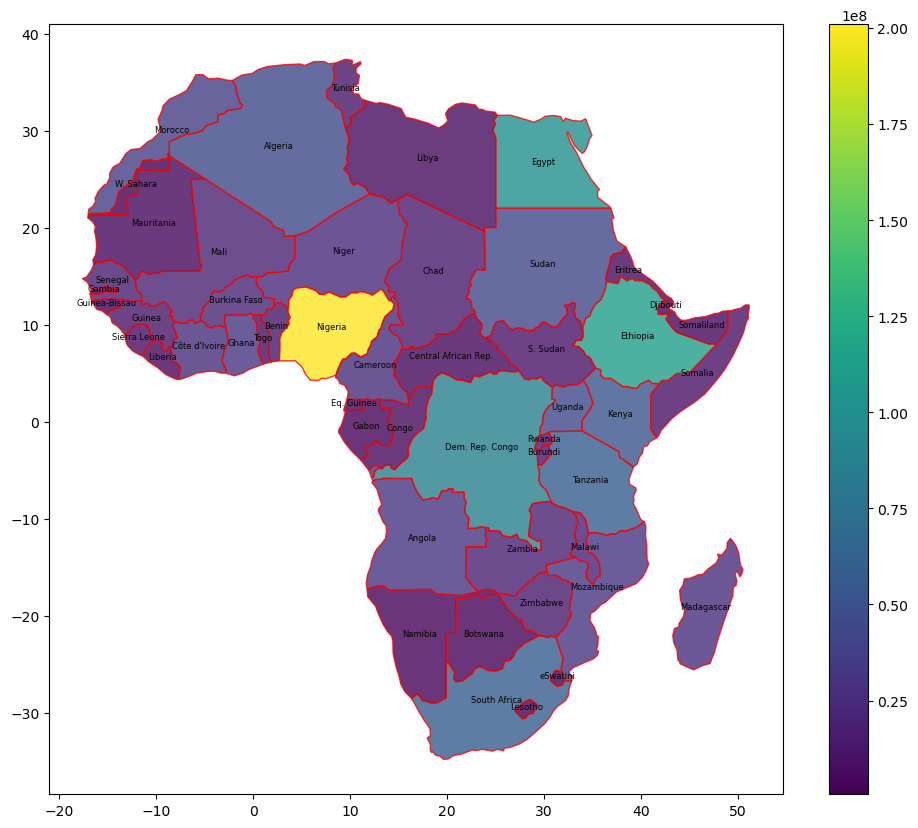

In [47]:
import matplotlib.pyplot as plt

# Plot Africa with symbology
fig, ax = plt.subplots(figsize=(12, 10))
africa.plot(
    column="pop_est",   # field for symbology
    cmap='viridis',     # Choosing color symbology
    legend=True,        # Adding legend
    edgecolor='red',    # Adding boundary size
    alpha=0.8,          # Transparency
    ax=ax
)

# Add labels based on the 'name' column
for x, y, label in zip(africa.geometry.centroid.x, africa.geometry.centroid.y, africa['name']):
    ax.text(x, y, label, fontsize=6, ha='center', color='black')

plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_20392\376354523.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(africa.geometry.centroid.x, africa.geometry.centroid.y, africa['name']):


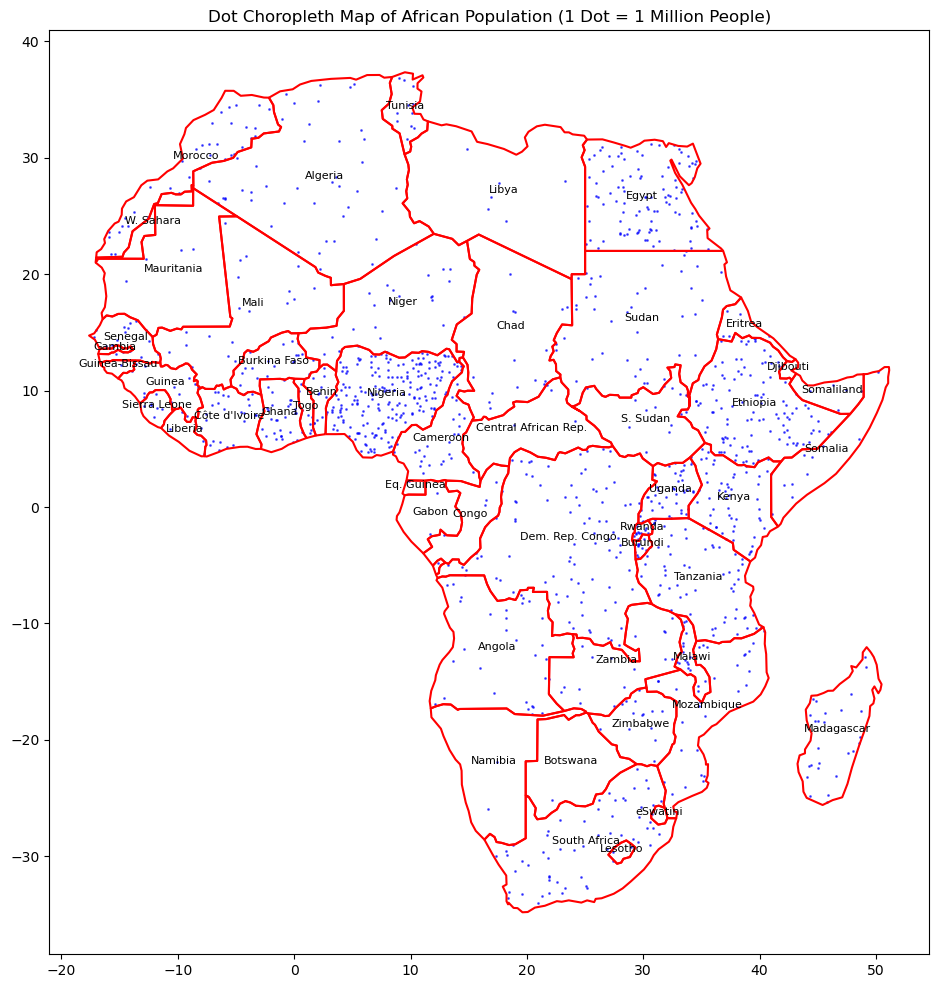

In [48]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# Parameters for the dot density
people_per_dot = 1_000_000  # 1 dot = 1 million people

# Plot base map of Africa with boundaries
fig, ax = plt.subplots(figsize=(12, 12))
africa.boundary.plot(ax=ax, edgecolor='red')  # Plot boundaries of countries

# Plot dots for each country based on population estimate
for idx, row in africa.iterrows():
    # Calculate number of dots for the given country
    num_dots = int(row['pop_est'] / people_per_dot)
    
    # Generate random points within each country polygon
    points = []
    while len(points) < num_dots:
        # Get a random point within the bounds of the polygon
        minx, miny, maxx, maxy = row['geometry'].bounds
        random_point = gpd.points_from_xy(
            [np.random.uniform(minx, maxx)], 
            [np.random.uniform(miny, maxy)]
        )[0]
        
        # Check if the point is inside the polygon
        if row['geometry'].contains(random_point):
            points.append(random_point)
    
    # Plot the dots
    x_coords = [point.x for point in points]
    y_coords = [point.y for point in points]
    ax.scatter(x_coords, y_coords, color='blue', s=1, alpha=0.6)

# Add country labels based on the 'name' column
for x, y, label in zip(africa.geometry.centroid.x, africa.geometry.centroid.y, africa['name']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')

plt.title('Dot Choropleth Map of African Population (1 Dot = 1 Million People)')
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_20392\3272234485.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(africa.geometry.centroid.x, africa.geometry.centroid.y, africa['name']):


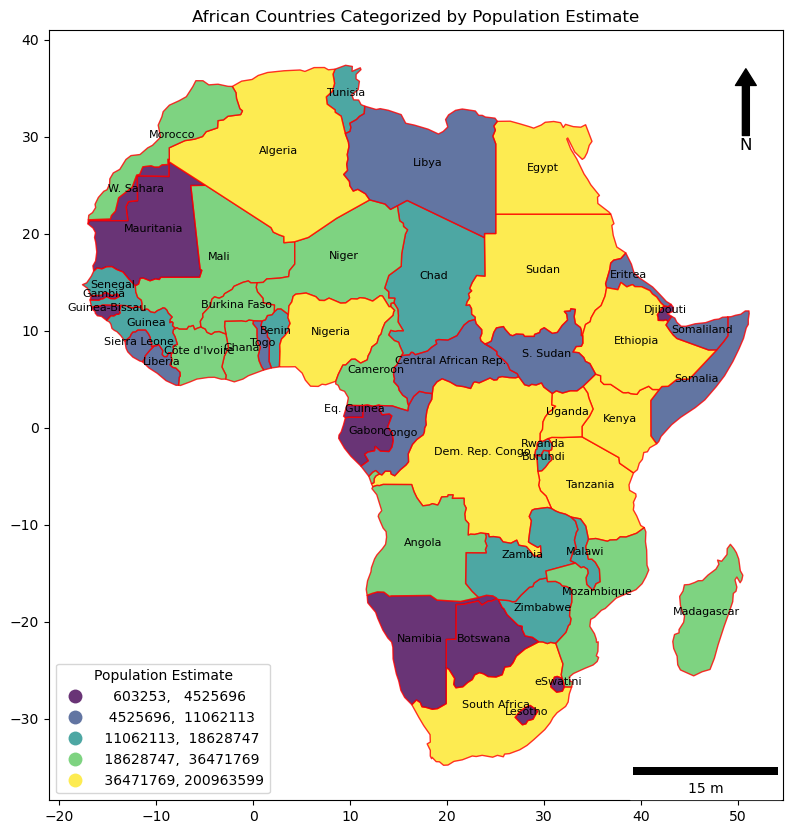

In [53]:
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import geopandas as gpd
import mapclassify  # Use for classification

# Classify population estimates into categories (e.g., 5 quantiles)
scheme = mapclassify.Quantiles(africa['pop_est'], k=5)

# Plot Africa with categorized symbology
fig, ax = plt.subplots(figsize=(10, 10))
africa.plot(
    column="pop_est",           # Field for symbology
    cmap='viridis',             # Choosing color symbology
    legend=True,                # Adding legend
    edgecolor='red',            # Adding boundary color
    alpha=0.8,                  # Transparency
    ax=ax,
    scheme='quantiles',         # Use quantiles classification
    classification_kwds={'k': 5},  # Number of categories
    legend_kwds={
        'title': 'Population Estimate',
        'loc': 'lower left',
        'fmt': '{:.0f}'         # Format for the legend labels
    }
)

# # Add scale bar
# scalebar = ScaleBar(1, location='lower right')  # 1 unit (meters) assuming CRS is in meters
# ax.add_artist(scalebar)

# # Add a North arrow
# x, y, arrow_length = 0.95, 0.95, 0.1  # Position and size of the arrow
# ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
#             arrowprops=dict(facecolor='black', width=5, headwidth=15),
#             ha='center', va='center', fontsize=12, xycoords=ax.transAxes)

# Add labels based on the 'name' column
for x, y, label in zip(africa.geometry.centroid.x, africa.geometry.centroid.y, africa['name']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')

plt.title("African Countries Categorized by Population Estimate")
plt.show()


### Interactive Mapping

In [36]:
africa = world_gdf[world_gdf['continent'] == 'Africa']

africa.explore(
    tooltip='name',
    popup=True,
    column='name',
    cmap='Set1',
    style_kwds=({
        'color': 'black'
    })
)